importing libraries

In [3]:
import librosa
import numpy as np
from IPython.display import Audio

In [4]:
#Load the audio file
AUDIO_FILE = 'h_1.wav'
sample_rate="44100"
sample_rate=int(sample_rate)
sample, sample_rate = librosa.load(AUDIO_FILE, sr=sample_rate)
from IPython.display import Audio
Audio(AUDIO_FILE)

In [5]:
len(sample)

266247

In [6]:
sample.shape

(266247,)

In [7]:
sample_rate

44100

In [8]:
sample_1,sample_rate_1=librosa.load(AUDIO_FILE,sr=22050)

In [9]:
sample_1

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -3.4755998e-05, -3.1319658e-05,  0.0000000e+00], dtype=float32)

In [10]:
sample_1.shape

(133124,)

Audio Signal Visualization-time domain

In [11]:
import matplotlib.pyplot as plt
import librosa.display

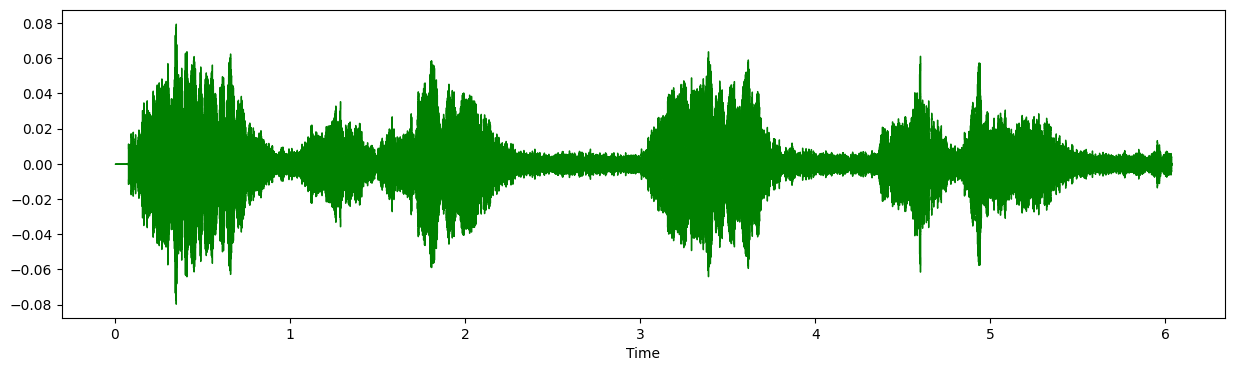

In [12]:
plt.figure(figsize=(15,4))
librosa.display.waveshow(sample,sr=sample_rate,color='green')

Feature Extraction  \
Amplitude Envelope- The amplitude envelope for a frame of an audio signal is simply the maximum value of its amplitude in that frame.

In [13]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []

    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length):
        amplitude_envelope_current_frame = max(signal[i:i+frame_size])
        amplitude_envelope.append(amplitude_envelope_current_frame)

    return np.array(amplitude_envelope)

frames:range(0, 521),time:0.023219954648526078


(-0.15, 0.15)

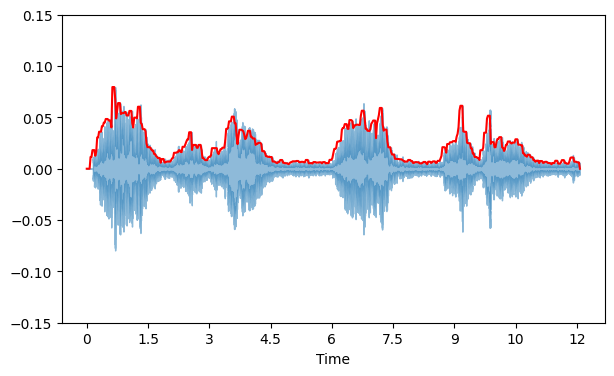

In [14]:
ae_f1 = amplitude_envelope(sample, 1500, 512)
plt.figure(figsize=(7, 4))
frames = range(len(ae_f1))
t = librosa.frames_to_time(frames, hop_length=512)
print(f'frames:{frames},time:{t[1]}')
librosa.display.waveshow(sample, alpha=0.5)
plt.plot(t, ae_f1, color="r")
plt.ylim((-.15, .15))
#plt.title("first_file_AE")


Zero Crossing Rate-The zero-crossing rate is defined as the number of times the signal changes its sign (from positive to negative or vice versa) divided by the total number of samples in the signal.

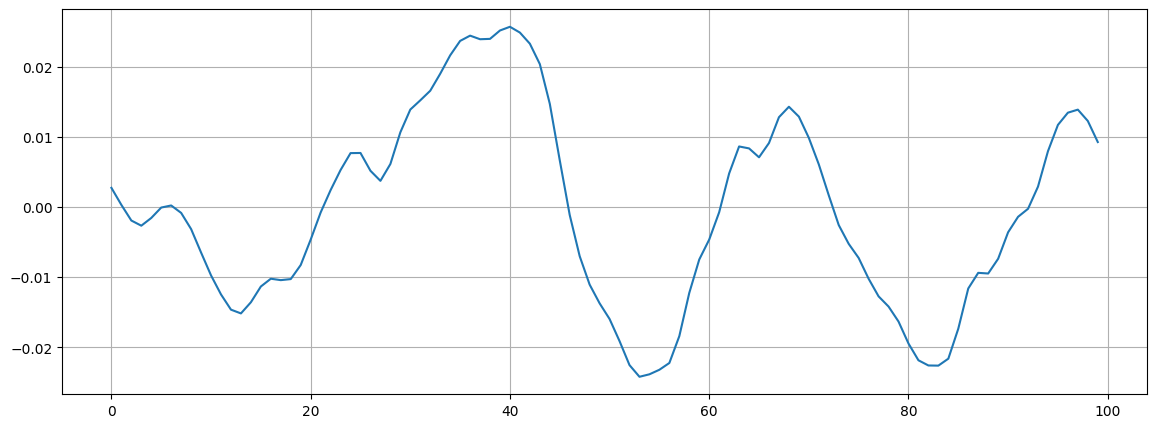

In [15]:
n0=10000
n1=10100
plt.figure(figsize=(14,5))
plt.plot(sample[n0:n1])
plt.grid()

In [16]:
zero_crossings=librosa.zero_crossings(sample,pad=False)

In [17]:
len(zero_crossings)

266247

In [18]:
sum(zero_crossings)

28580

In [19]:
zero_crossings_rate=librosa.feature.zero_crossing_rate(sample,pad=False)

In [20]:
zero_crossings_rate.shape

(1, 521)

Root-mean-square

In [21]:
rms=librosa.feature.rms(y=sample)

In [22]:
rms

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.38764666e-10, 1.91999332e-03, 4.07028990e-03, 5.29572647e-03,
        5.90172503e-03, 6.03729486e-03, 6.12844108e-03, 6.05160883e-03,
        7.59840617e-03, 9.28904302e-03, 1.07331034e-02, 1.17146410e-02,
        1.18979625e-02, 1.27001004e-02, 1.34064639e-02, 1.44564174e-02,
        1.65707320e-02, 1.73653904e-02, 1.73253715e-02, 1.86393633e-02,
        1.78002883e-02, 1.75465960e-02, 1.72776487e-02, 1.53771546e-02,
        2.08431948e-02, 2.21464187e-02, 2.35272273e-02, 2.54310593e-02,
        2.05488000e-02, 2.23929025e-02, 2.38859020e-02, 2.36025378e-02,
        2.59286761e-02, 2.48369407e-02, 2.35635191e-02, 2.17658728e-02,
        2.05837358e-02, 1.90834813e-02, 1.72756575e-02, 2.01364476e-02,
        2.12935526e-02, 2.26094611e-02, 2.49135345e-02, 2.34139636e-02,
        2.12888476e-02, 1.81390308e-02, 1.53054474e-02, 1.73189770e-02,
        1.84139162e-02, 1.86112877e-02, 2.09032372e-02, 2.388069

In [23]:
from librosa.feature import rms
S,phase=librosa.magphase(librosa.stft(sample))
rms=librosa.feature.rms(S=S)

In [24]:
rms.shape

(1, 521)

In [25]:
times = librosa.times_like(rms)


In [26]:
times

array([ 0.        ,  0.02321995,  0.04643991,  0.06965986,  0.09287982,
        0.11609977,  0.13931973,  0.16253968,  0.18575964,  0.20897959,
        0.23219955,  0.2554195 ,  0.27863946,  0.30185941,  0.32507937,
        0.34829932,  0.37151927,  0.39473923,  0.41795918,  0.44117914,
        0.46439909,  0.48761905,  0.510839  ,  0.53405896,  0.55727891,
        0.58049887,  0.60371882,  0.62693878,  0.65015873,  0.67337868,
        0.69659864,  0.71981859,  0.74303855,  0.7662585 ,  0.78947846,
        0.81269841,  0.83591837,  0.85913832,  0.88235828,  0.90557823,
        0.92879819,  0.95201814,  0.9752381 ,  0.99845805,  1.021678  ,
        1.04489796,  1.06811791,  1.09133787,  1.11455782,  1.13777778,
        1.16099773,  1.18421769,  1.20743764,  1.2306576 ,  1.25387755,
        1.27709751,  1.30031746,  1.32353741,  1.34675737,  1.36997732,
        1.39319728,  1.41641723,  1.43963719,  1.46285714,  1.4860771 ,
        1.50929705,  1.53251701,  1.55573696,  1.57895692,  1.60

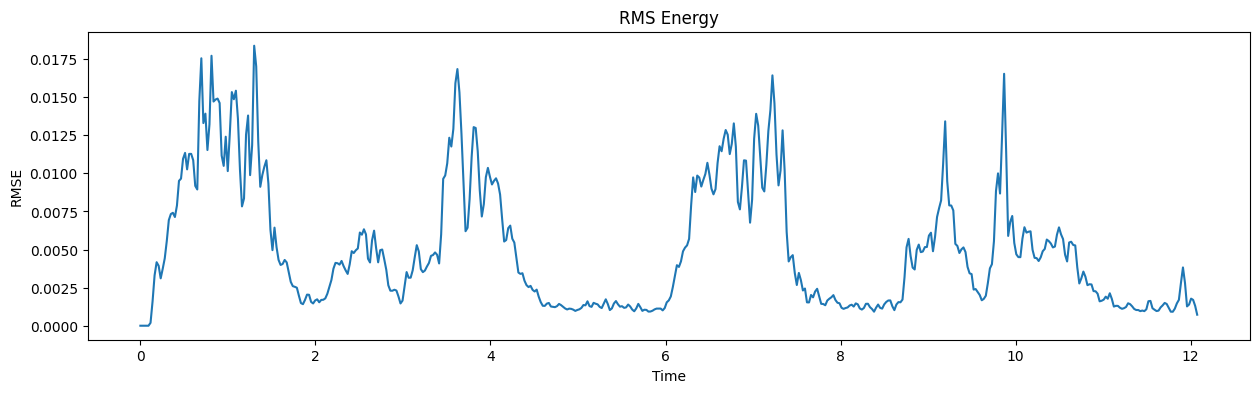

In [27]:
#plotting for RMSE
plt.figure(figsize=(15, 4))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('RMS Energy')
plt.plot(times, rms[0], label='RMS Energy')
#plt.legend()
plt.title('RMS Energy')
plt.show()


Spectrogram Visualization

In [28]:
X=librosa.stft(sample)
Xdb=librosa.amplitude_to_db(abs(X))

In [29]:
Xdb.shape

(1025, 521)

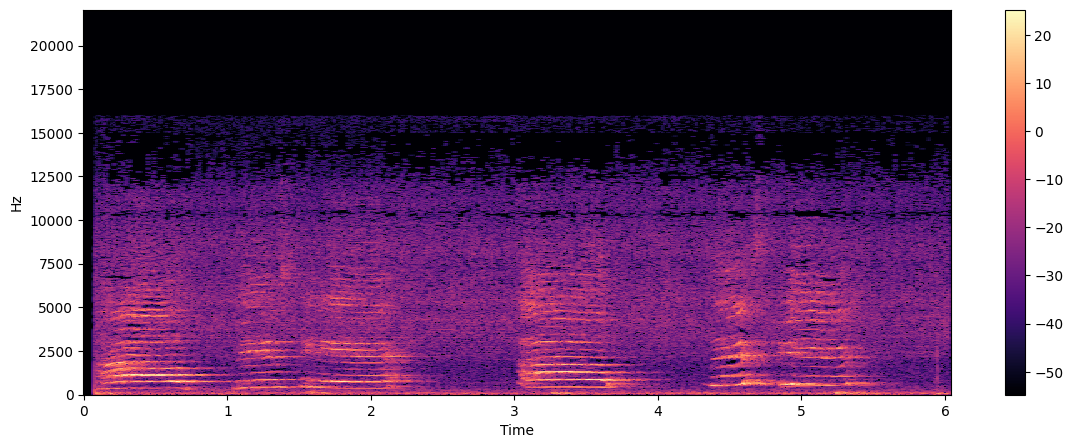

In [30]:
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb,sr=sample_rate,x_axis='time',y_axis='hz')
plt.colorbar()

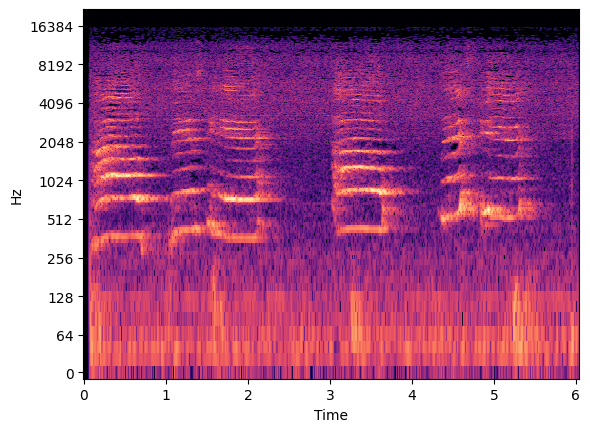

In [31]:
librosa.display.specshow(Xdb,sr=sample_rate,x_axis='time',y_axis='log')

Mel Filter Banks

In [32]:
filter_banks=librosa.filters.mel(n_fft=2048,sr=44100,n_mels=10)

In [33]:
filter_banks.shape


(10, 1025)

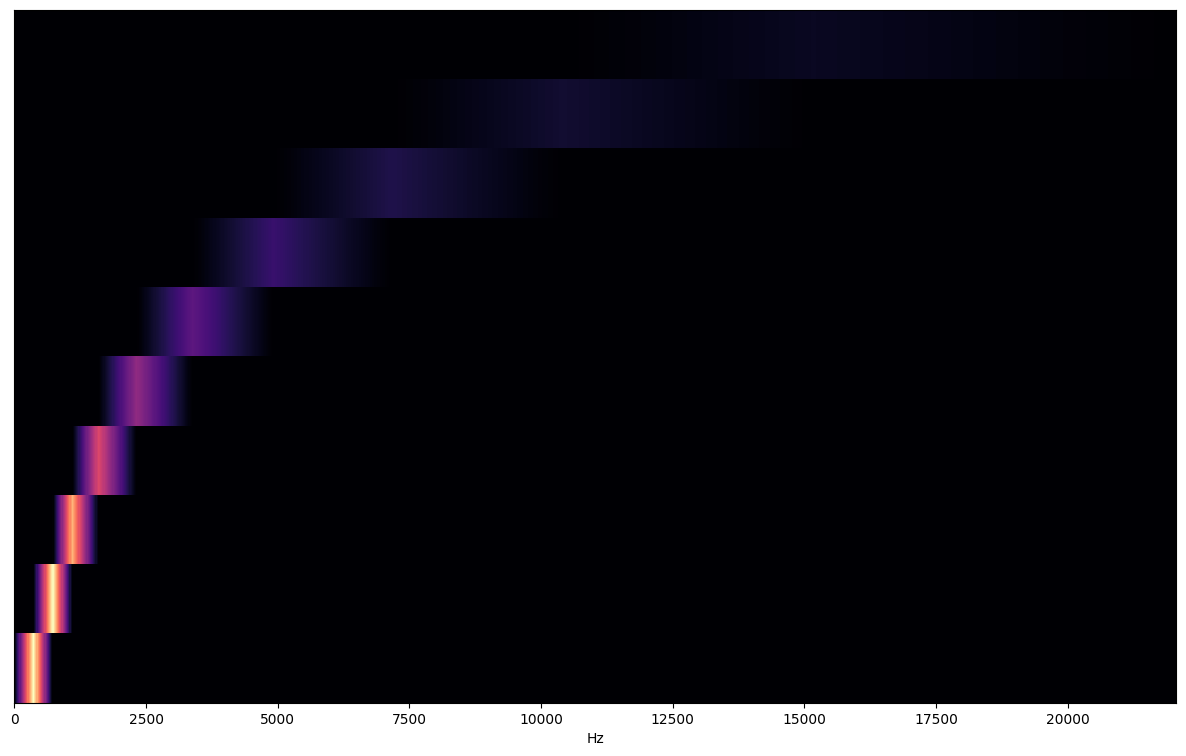

In [34]:
plt.figure(figsize=(15,9))
librosa.display.specshow(filter_banks,sr=44100,x_axis='linear')
plt.show()

Extracting mel spectogram

In [35]:
mel_spectrogram=librosa.feature.melspectrogram(y=sample,sr=44100,n_fft=2048,hop_length=512,n_mels=10)

In [36]:
mel_spectrogram.shape

(10, 521)

In [37]:
log_mel_spectrogram=librosa.power_to_db(mel_spectrogram)

In [38]:
log_mel_spectrogram.shape

(10, 521)

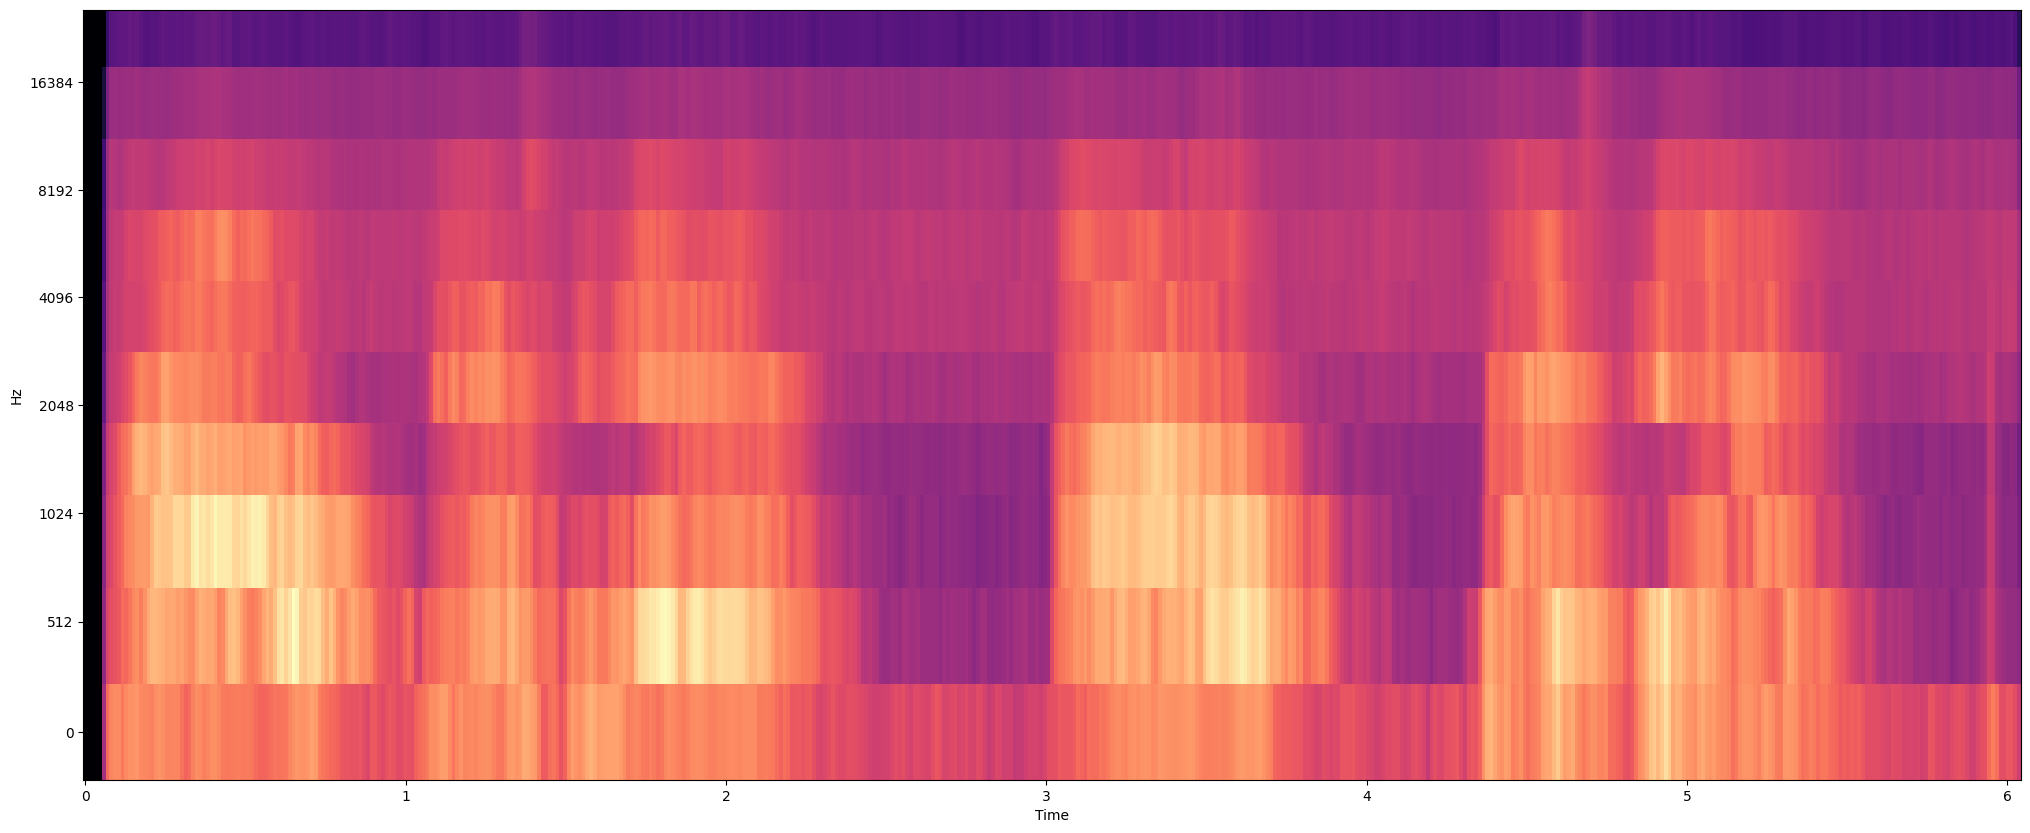

In [39]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram,x_axis='time',y_axis='mel',sr=44100)
plt.show()


Mel Frequency Cepstral Coefficients(MFCC)

In [40]:
mfccs=librosa.feature.mfcc(y=sample,sr=44100,n_mfcc=10)

In [41]:
mfccs.shape

(10, 521)

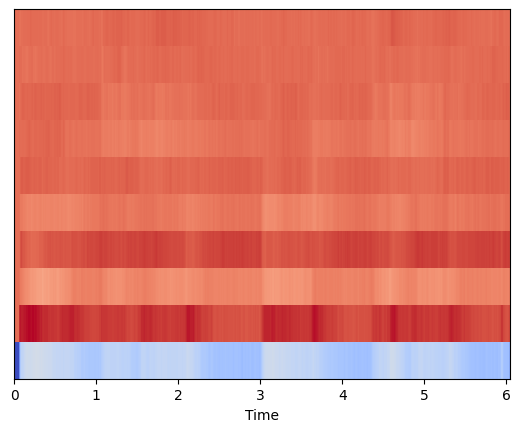

In [42]:
librosa.display.specshow(mfccs,sr=44100,x_axis='time')

In [43]:
delta_mfccs=librosa.feature.delta(mfccs)
delta2_mfccs=librosa.feature.delta(mfccs,order=2)

In [44]:
comprehensive_mfccs=np.concatenate((mfccs,delta_mfccs,delta2_mfccs))

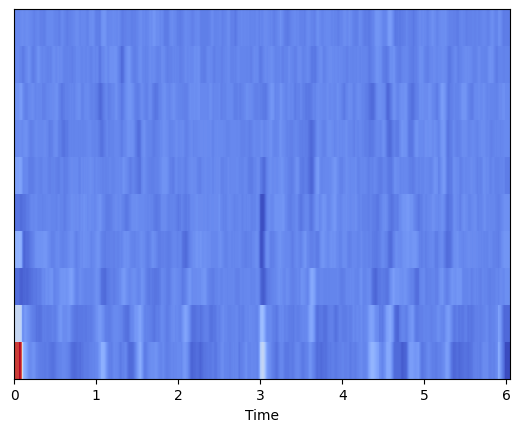

In [45]:
librosa.display.specshow(delta_mfccs,sr=44100,x_axis='time')

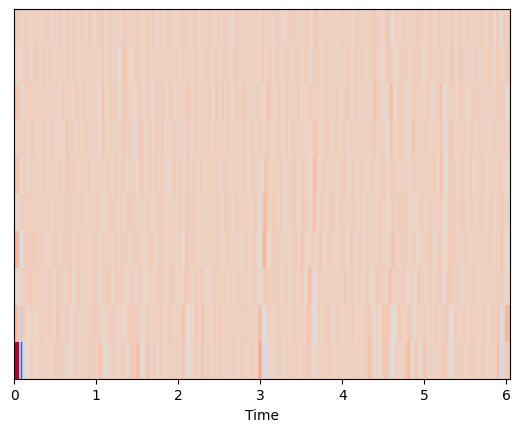

In [46]:
librosa.display.specshow(delta2_mfccs,sr=44100,x_axis='time')

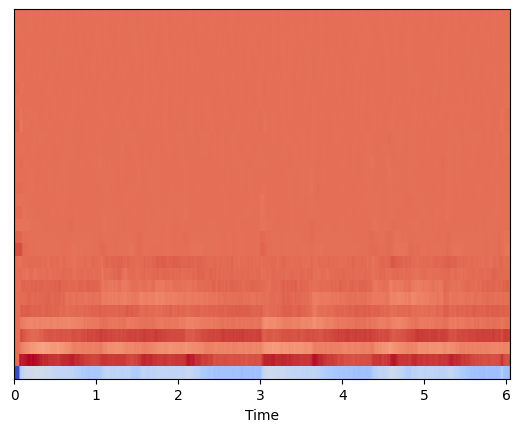

In [47]:
librosa.display.specshow(comprehensive_mfccs,sr=44100,x_axis='time')

#Spectral Centroid-  
The spectral centroid represents the center of mass of the power spectrum of a signal. Mathematically, it's the weighted mean of the frequencies present in the spectrum, where the magnitude of each frequency component serves as the weight.

In [48]:
all_centroids=librosa.feature.spectral_centroid(y=sample, sr=44100,n_fft=1024,hop_length=512)[0]

In [49]:
all_centroids.shape

(521,)

In [50]:
frames=range(len(all_centroids))

In [51]:
frames

range(0, 521)

In [52]:
t=librosa.frames_to_time(frames)

In [53]:
t

array([ 0.        ,  0.02321995,  0.04643991,  0.06965986,  0.09287982,
        0.11609977,  0.13931973,  0.16253968,  0.18575964,  0.20897959,
        0.23219955,  0.2554195 ,  0.27863946,  0.30185941,  0.32507937,
        0.34829932,  0.37151927,  0.39473923,  0.41795918,  0.44117914,
        0.46439909,  0.48761905,  0.510839  ,  0.53405896,  0.55727891,
        0.58049887,  0.60371882,  0.62693878,  0.65015873,  0.67337868,
        0.69659864,  0.71981859,  0.74303855,  0.7662585 ,  0.78947846,
        0.81269841,  0.83591837,  0.85913832,  0.88235828,  0.90557823,
        0.92879819,  0.95201814,  0.9752381 ,  0.99845805,  1.021678  ,
        1.04489796,  1.06811791,  1.09133787,  1.11455782,  1.13777778,
        1.16099773,  1.18421769,  1.20743764,  1.2306576 ,  1.25387755,
        1.27709751,  1.30031746,  1.32353741,  1.34675737,  1.36997732,
        1.39319728,  1.41641723,  1.43963719,  1.46285714,  1.4860771 ,
        1.50929705,  1.53251701,  1.55573696,  1.57895692,  1.60

In [54]:
t.shape

(521,)

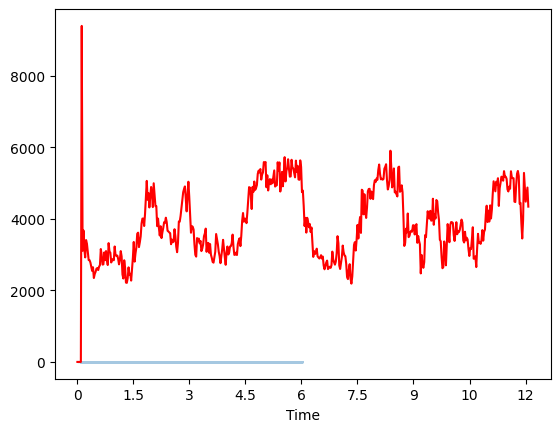

In [55]:

librosa.display.waveshow(sample,sr=sample_rate,alpha=0.4)

plt.plot(t,all_centroids,color='r')
plt.show()

#Spectral Bandwith-
Spectral bandwidth is a concept in signal processing that measures the width of the frequency range over which the energy or power of a signal is distributed.Mathematically it is the weighted mean of the distances of frequency bands from spectral centroid.

In [56]:
band=librosa.feature.spectral_bandwidth(y=sample, sr=44100,n_fft=1024,hop_length=512)[0]

In [57]:
band.shape

(521,)

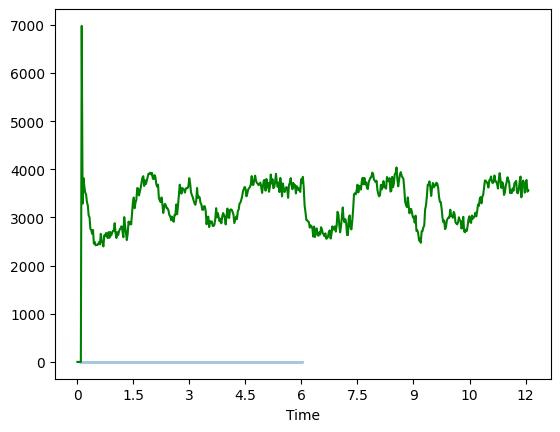

In [58]:
librosa.display.waveshow(sample,sr=sample_rate,alpha=0.4)
plt.plot(t,band,color='g')
plt.show()

#Spectral_rolloff-
 It provides information about where the majority of the energy in the signal is concentrated in terms of frequency.


In [59]:
all_spectral_rolloff=librosa.feature.spectral_rolloff(y=sample, sr=44100,n_fft=1024,hop_length=512)[0]


In [60]:
all_spectral_rolloff.shape

(521,)

In [61]:
#computing time variable for visualization
frames_rolloff=range(len(all_spectral_rolloff))

In [62]:
frames_rolloff

range(0, 521)

In [63]:
t=librosa.frames_to_time(frames_rolloff)

In [64]:
t.shape

(521,)

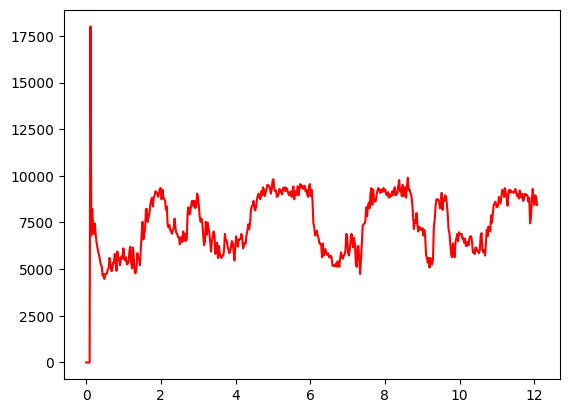

In [65]:
plt.plot(t,all_spectral_rolloff,color='r')

Chroma Frequencies

In [66]:
chromagram=librosa.feature.chroma_stft(y=sample,sr=44100,hop_length=512)

In [67]:
chromagram.shape

(12, 521)

In [68]:
chromagram.shape

(12, 521)

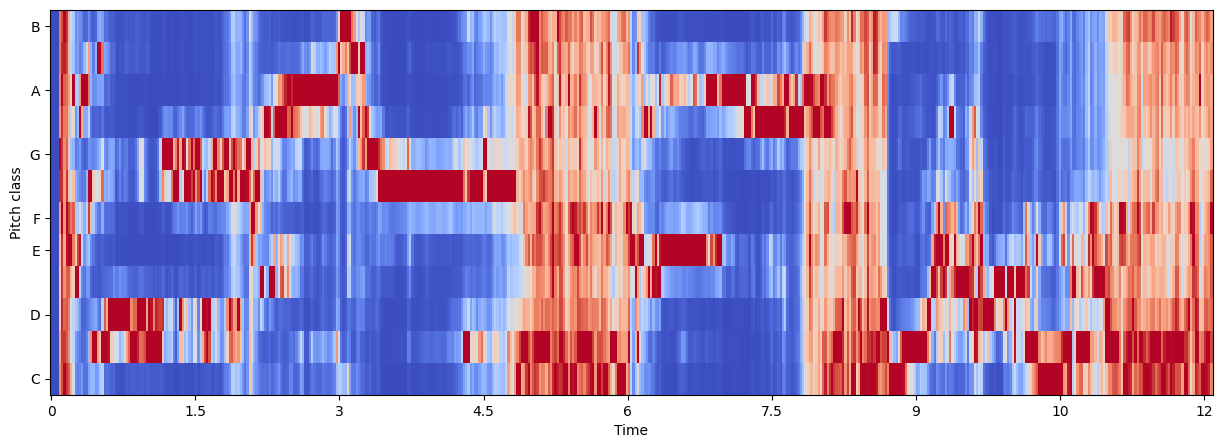

In [69]:
plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram,x_axis='time',y_axis='chroma',hop_length=512,cmap='coolwarm')